# Spaceship Titanic 2차 시도

- 맨 처음 결과물은 약 0.745~ 정도의 성능을 보여줌
- 모델 학습 전 데이터 분리에 실수가 있었음
- 개인적으로 느낀 감상은, 데이터 전처리가 부족했던 것 같아 처음부터 다시 시도해보려함

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [71]:
ST_test = pd.read_csv('./spaceship-titanic/test.csv')
ST_train = pd.read_csv('./spaceship-titanic/train.csv')
sub = pd.read_csv('./spaceship-titanic/sample_submission.csv')

In [72]:
ST_test.shape, ST_train.shape, sub.shape

((4277, 13), (8693, 14), (4277, 2))

## 데이터 탐색

In [73]:
ST_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [74]:
ST_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [75]:
ST_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [76]:
ST_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [77]:
PassengerID = ST_test["PassengerId"]
PassengerID.head()

0    0013_01
1    0018_01
2    0019_01
3    0021_01
4    0023_01
Name: PassengerId, dtype: object

In [78]:
ST_train.set_index('PassengerId',inplace=True)
ST_test.set_index('PassengerId',inplace=True)

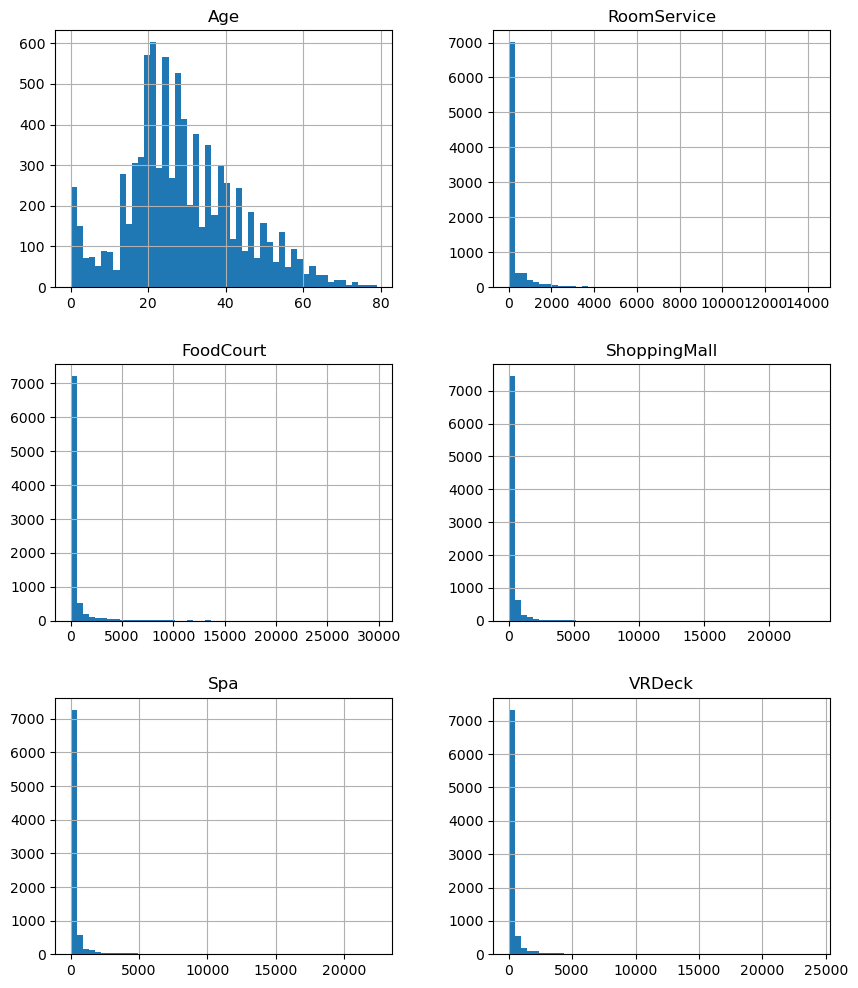

In [79]:
ST_hist = ST_train.hist(bins=50, figsize=(10, 12))

위의 지출 항목들은 확실히 로그변환이 필요해보인다.

In [80]:
ST_train.describe() # 수치형 데이터

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [81]:
ST_train.describe(include='object') # 범주형

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8492,8476,8494,8511,8490,8493
unique,3,2,6560,3,2,8473
top,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,4602,5439,8,5915,8291,2


In [82]:
ST_train.duplicated().sum() # 중복 데이터 없음

0

In [83]:
ST_train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [84]:
ST_test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

결측값을 채우기 전, 각 특성들이 타겟과 어떤 연관이 있는지 살펴보기

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

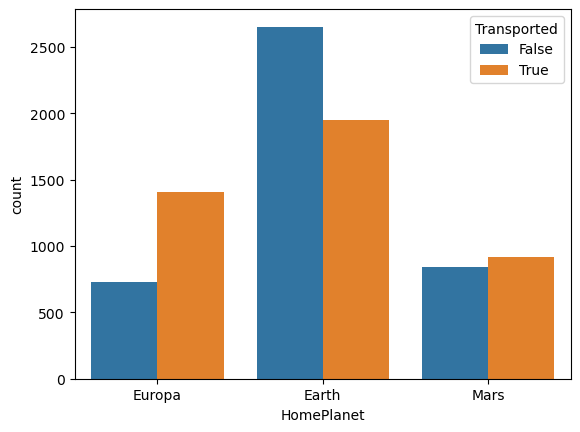

In [85]:
sns.countplot(data=ST_train, x='HomePlanet', hue='Transported')

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

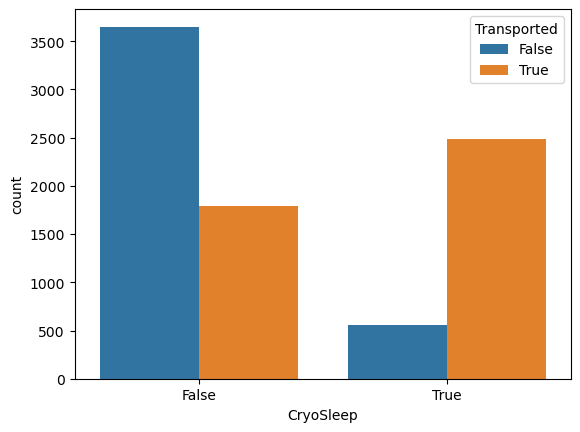

In [86]:
sns.countplot(data=ST_train, x='CryoSleep', hue='Transported')

<AxesSubplot:xlabel='VIP', ylabel='count'>

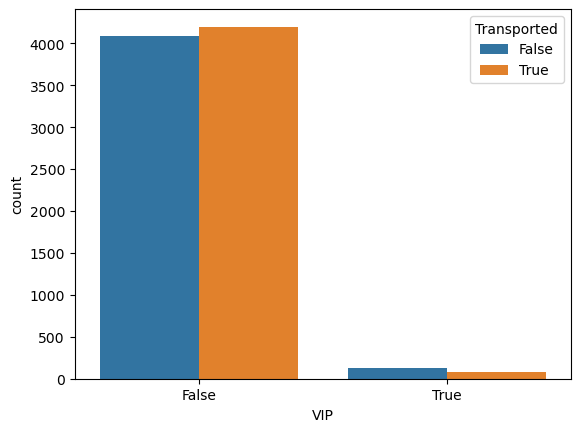

In [87]:
sns.countplot(data=ST_train, x='VIP', hue='Transported')

<AxesSubplot:xlabel='Destination', ylabel='count'>

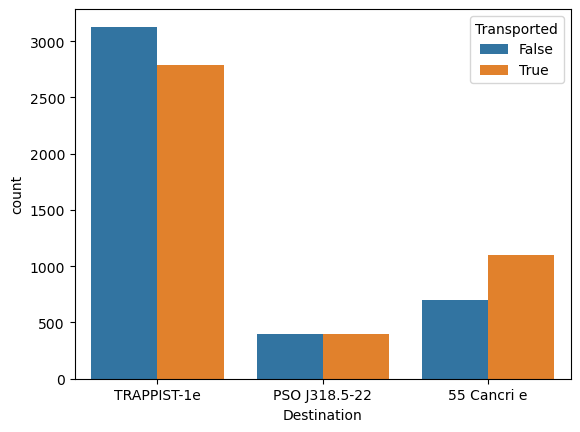

In [88]:
sns.countplot(data=ST_train, x='Destination', hue='Transported')

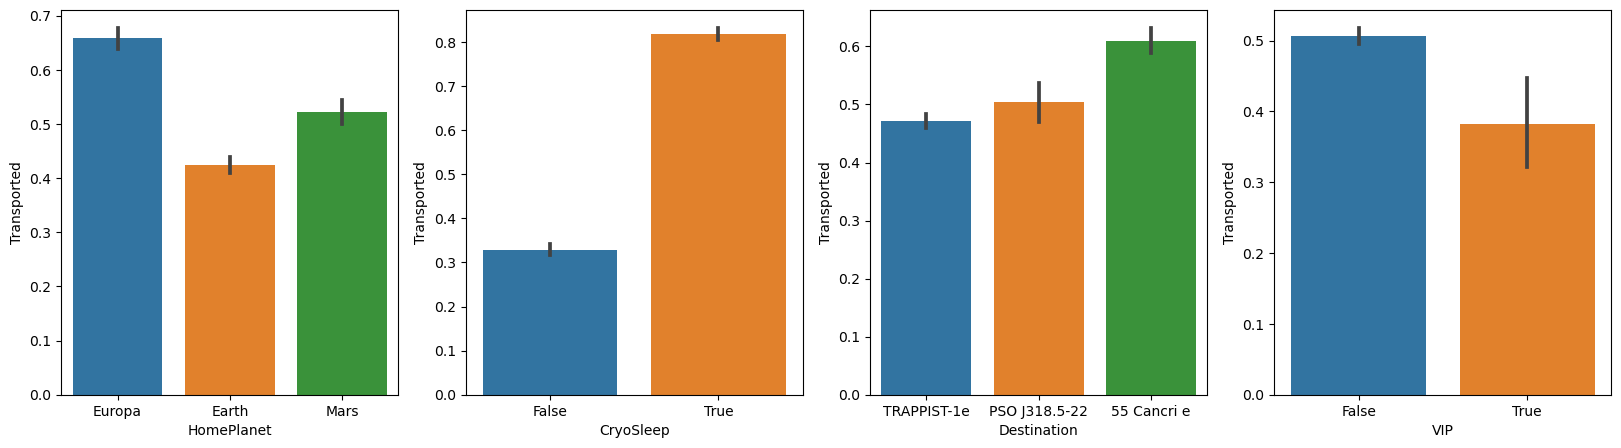

In [89]:
cat_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
figure, axes = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(20, 5))

for index, column in enumerate(cat_columns):
    sns.barplot(data=ST_train, x=column, y='Transported', ax=axes[index])

데이터 시각화를 통해, VIP 특성의 삭제도 고려해보고, 수치형 데이터의 로그변환도 필요하단 것을 발견함

<AxesSubplot:xlabel='Age', ylabel='Count'>

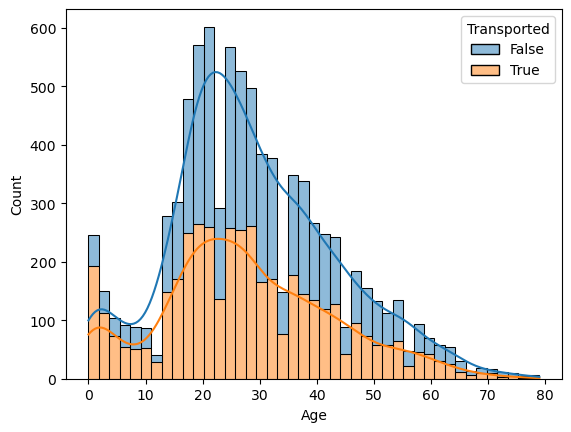

In [90]:
sns.histplot(data=ST_train, x='Age', hue='Transported', multiple='stack', kde=True)

<AxesSubplot:xlabel='Age_cat', ylabel='count'>

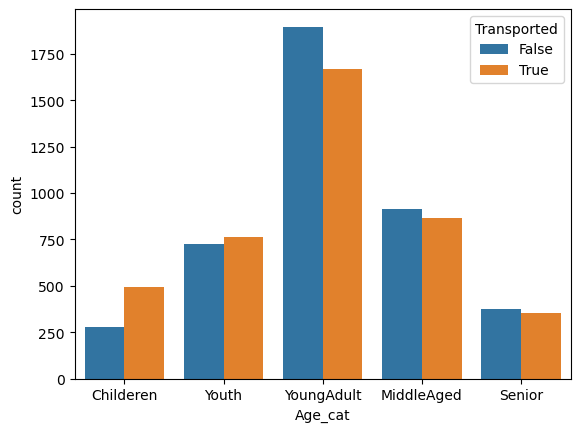

In [91]:
# Age를 구간별로 나눠서 분석
bins = [0, 13, 20, 35, 50, 75]
group_names = ['Childeren', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
ST_train['Age_cat'] = pd.cut(ST_train['Age'], bins, labels=group_names)
ST_test['Age_cat'] = pd.cut(ST_test['Age'], bins, labels=group_names)

sns.countplot(data=ST_train, x='Age_cat', hue='Transported')

<AxesSubplot:xlabel='Age_cat', ylabel='Transported'>

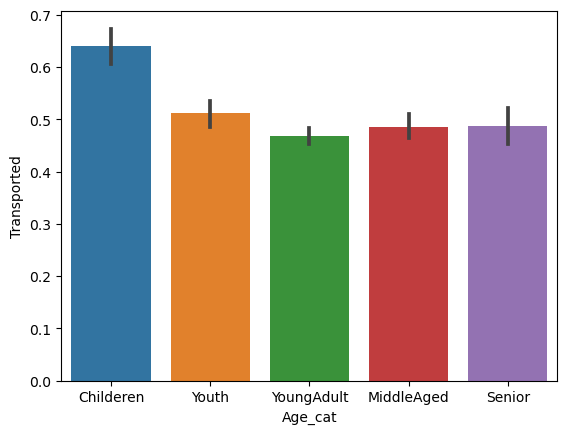

In [92]:
sns.barplot(data=ST_train, x='Age_cat', y='Transported')

→ Childerne과 Youth의 Transported가 조금 더 높은 것을 확인

이번에는 지출이 있는 승객과 없는 승객을 나눠서 분석해보자

In [93]:
# 지출 특성을 담은 변수 생성
Spend_list = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# 지출이 있는 특성과 없는 특성 생성
ST_train['Spend'] = ST_train[Spend_list].sum(axis=1)
ST_train['No_spend'] = (ST_train['Spend']==0).astype(int)

ST_test['Spend'] = ST_test[Spend_list].sum(axis=1)
ST_test['No_spend'] = (ST_test['Spend']==0).astype(int)

(0.0, 15000.0)

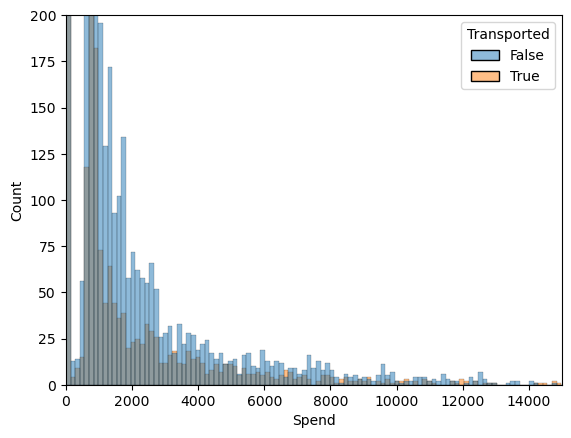

In [94]:
# 총 지출액과 Suported의 연관성
sns.histplot(data=ST_train, x='Spend', hue='Transported')
plt.ylim([0, 200])
plt.xlim([0, 15000])

<AxesSubplot:xlabel='No_spend', ylabel='count'>

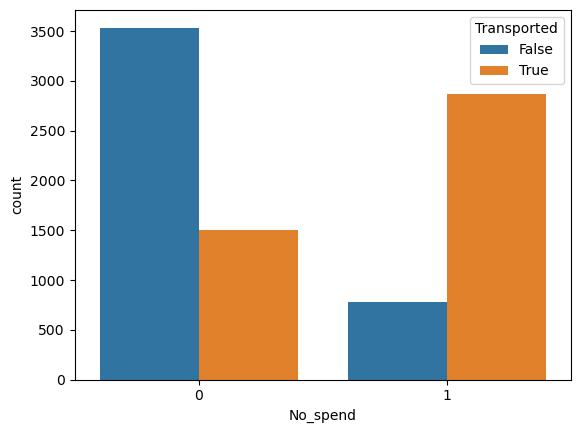

In [95]:
# 지출이 아예 없는 경우(0원)
sns.countplot(data=ST_train, x='No_spend', hue='Transported')

지출이 없는 승객의 전송율(Transported)이 더 높다!

이제 Cabin 특성을 Deck, Num, Side로 split해보자.

In [96]:
# Cabin 특성 스플릿
ST_train[['Deck', 'Num', 'Side']] = ST_train.Cabin.str.split('/', expand=True) 
ST_test[['Deck', 'Num', 'Side']] = ST_test.Cabin.str.split('/', expand=True) 

<AxesSubplot:xlabel='Deck', ylabel='count'>

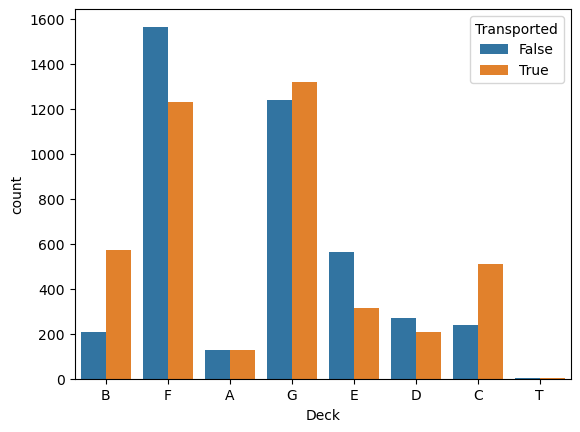

In [97]:
# Deck
sns.countplot(data=ST_train, x='Deck', hue='Transported')

<AxesSubplot:xlabel='Side', ylabel='count'>

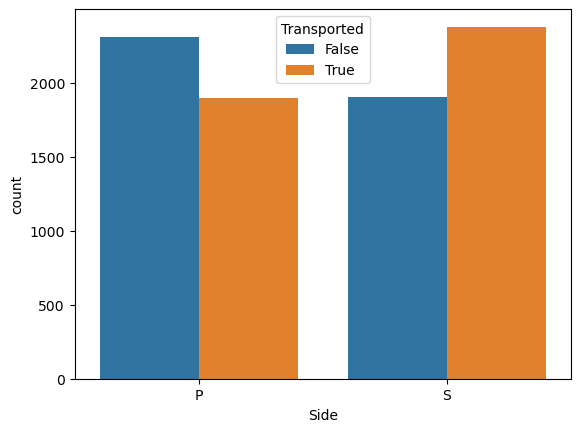

In [98]:
# Side
sns.countplot(data=ST_train, x='Side', hue='Transported')

Deck F와 G에서 높은 수치를 보이고 있고, 좌현보다는 우현의 전송율이 더 높은 것을 확인

In [99]:
ST_train['Num'].nunique()

1817

In [100]:
# Num을 int에서 float으로 변환
ST_train['Num'] = ST_train['Num'].astype(np.float32)
ST_test['Num'] = ST_test['Num'].astype(np.float32)

(0.0, 2000.0)

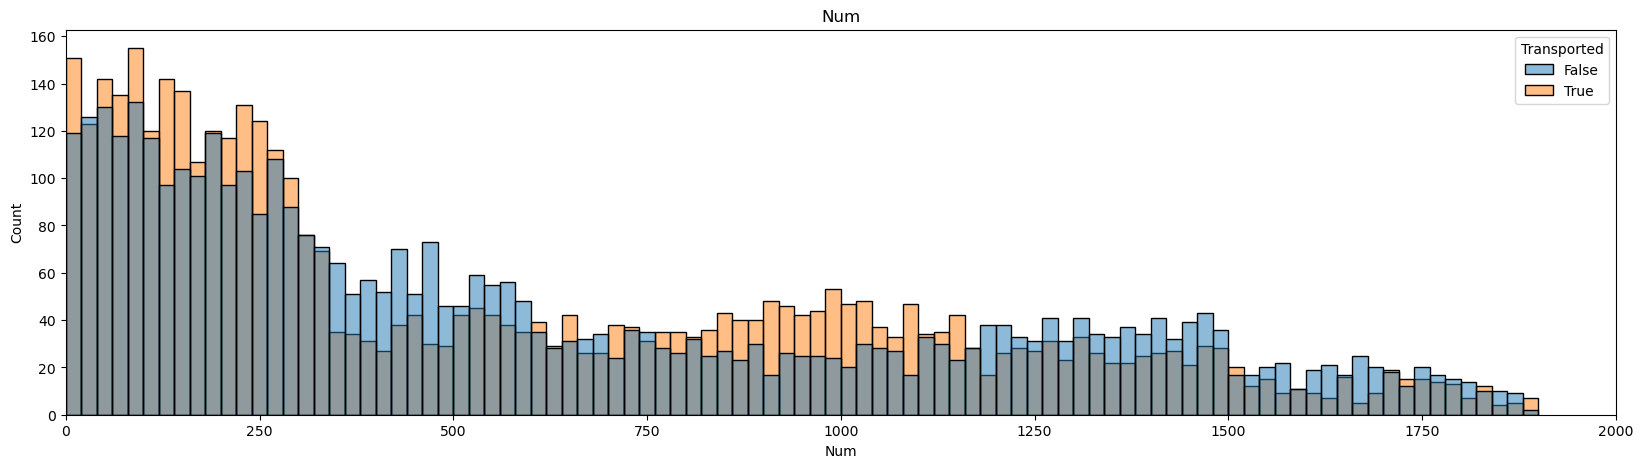

In [101]:
fig=plt.figure(figsize=(20,5))
sns.histplot(data=ST_train, x='Num', hue='Transported',binwidth=20)
plt.title('Num')
plt.xlim([0,2000])

Num 특성의 경우, 구간별로 유의미한 차이를 보이는 것 확인.
Transported에 영향을 주는 특성이 맞는 것 같다.

## 결측값 채우기

PassangerId와 Transported를 제외한 나머지 특성에는 모두 전체 비율의 2% 안팎으로 결측값이 존재.

In [102]:
ST_train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Age_cat         367
Spend             0
No_spend          0
Deck            199
Num             199
Side            199
dtype: int64

In [103]:
ST_test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
Age_cat         177
Spend             0
No_spend          0
Deck            100
Num             100
Side            100
dtype: int64

In [104]:
ST_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Spend,No_spend,Num
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000,8494.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1440.866329,0.420223,600.367676
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2803.045694,0.493623,511.867157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.250000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,716.000000,0.000000,427.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1441.000000,1.000000,999.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000,1.000000,1894.000000


수치형 데이터는 모두 중앙값으로 처리했다.

In [105]:
# Age의 결측값은 중앙값으로 대체
ST_train['Age'] =ST_train['Age'].fillna(ST_train['Age'].median())
ST_test['Age'] =ST_test['Age'].fillna(ST_test['Age'].median())

In [106]:
# 수치형 중 Age를 제외한 나머지 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck' 는 중앙값이 모두 0임
ST_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = ST_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
ST_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = ST_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [107]:
ST_train['Num'].mean()

600.36767578125

In [108]:
# Num은 평균값을 넣어보았다
ST_train['Num'] = ST_train['Num'].fillna(ST_train['Num'].mean())
ST_test['Num'] = ST_test['Num'].fillna(ST_test['Num'].mean())

In [109]:
ST_train.describe(include='object')

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Deck,Side
count,8492,8476,8494,8511,8490,8493,8494,8494
unique,3,2,6560,3,2,8473,8,2
top,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,F,S
freq,4602,5439,8,5915,8291,2,2794,4288


범주형 데이터는 최빈값으로 처리.

In [110]:
ST_train['HomePlanet'] = ST_train['HomePlanet'].fillna('Earth')
ST_test['HomePlanet'] = ST_test['HomePlanet'].fillna('Earth')

ST_train['CryoSleep'] = ST_train['CryoSleep'].fillna(False)
ST_test['CryoSleep'] = ST_test['CryoSleep'].fillna(False)

ST_train['Destination'] = ST_train['Destination'].fillna('TRAPPIST-1e')
ST_test['Destination'] = ST_test['Destination'].fillna('TRAPPIST-1e')

ST_train['VIP'] = ST_train['VIP'].fillna(False)
ST_test['VIP'] = ST_test['VIP'].fillna(False)

ST_train['Deck'] = ST_train['Deck'].fillna('F')
ST_test['Deck'] = ST_test['Deck'].fillna('F')

ST_train['Side'] = ST_train['Side'].fillna('S')
ST_test['Side'] = ST_test['Side'].fillna('S')

In [111]:
ST_train.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Age_cat         367
Spend             0
No_spend          0
Deck              0
Num               0
Side              0
dtype: int64

In [112]:
ST_test.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
Age_cat         177
Spend             0
No_spend          0
Deck              0
Num               0
Side              0
dtype: int64

불필요한 특성 삭제

In [113]:
ST_train.drop(['Cabin', 'Name', 'Age_cat'], axis=1, inplace=True)
ST_test.drop(['Cabin', 'Name', 'Age_cat'], axis=1, inplace=True)

In [114]:
ST_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Spend,No_spend,Deck,Num,Side
PassengerId,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1,B,0.0,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,0,F,0.0,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,0,A,0.0,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,0,A,0.0,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,0,F,1.0,S


In [115]:
ST_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Spend,No_spend,Deck,Num,Side
PassengerId,,,,,,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1,G,3.0,S
0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,2832.0,0,F,4.0,S
0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1,C,0.0,S
0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,7418.0,0,C,1.0,S
0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,645.0,0,F,5.0,S


#### 특성 스케일링

범주형 데이터는 더미변수로 만들어주기 위해 원핫 인코딩을 해야하고, 수치형 데이터는 꼬리가 긴 분포를 보여줬기 때문에 스케일링이 필요해보인다.

In [116]:
# 로그 스케일링
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Spend','Num']:
    ST_train[col] = np.log1p(ST_train[col])
    ST_test[col] = np.log1p(ST_test[col])

In [117]:
# 더미변수화 (원핫인코딩)
ST_train = pd.get_dummies(ST_train)
ST_test = pd.get_dummies(ST_test)

In [118]:
ST_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Spend,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,False,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.000000,...,0,1,0,0,0,0,0,0,1,0
0002_01,False,24.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,True,6.602588,...,0,0,0,0,0,1,0,0,0,1
0003_01,False,58.0,True,3.784190,8.182280,0.000000,8.812248,3.912023,False,9.248021,...,1,0,0,0,0,0,0,0,0,1
0003_02,False,33.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,False,8.551981,...,1,0,0,0,0,0,0,0,0,1
0004_01,False,16.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,True,6.995766,...,0,0,0,0,0,1,0,0,0,1


In [119]:
ST_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Spend,No_spend,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,True,27.0,False,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1,...,0,0,0,0,0,0,1,0,0,1
0018_01,False,19.0,False,0.000000,2.302585,0.000000,7.945910,0.00000,7.949091,0,...,0,0,0,0,0,1,0,0,0,1
0019_01,True,31.0,False,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1,...,0,0,1,0,0,0,0,0,0,1
0021_01,False,38.0,False,0.000000,8.802823,0.000000,5.204007,6.37332,8.911800,0,...,0,0,1,0,0,0,0,0,0,1
0023_01,False,20.0,False,2.397895,0.000000,6.455199,0.000000,0.00000,6.470800,0,...,0,0,0,0,0,1,0,0,0,1


## 데이터 분리

In [120]:
X = ST_train.drop('Transported', axis=1)
y = ST_train['Transported'].copy()

In [121]:
X.columns # Transported가 삭제된 것을 확인

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Spend', 'No_spend', 'Num', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S'],
      dtype='object')

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## 모델 학습

In [142]:
X_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Spend,No_spend,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
2513_01,False,28.0,False,0.000000,4.025352,0.000000,6.487684,0.000000,6.568078,0,...,0,0,0,0,0,1,0,0,0,1
2774_02,False,17.0,False,0.000000,7.086738,3.465736,0.000000,0.000000,7.112327,0,...,0,0,0,0,0,1,0,0,1,0
8862_04,True,28.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,...,0,0,1,0,0,0,0,0,0,1
8736_02,False,20.0,False,0.000000,1.098612,5.669881,6.884487,0.000000,7.145196,0,...,0,0,0,0,0,1,0,0,1,0
0539_02,True,36.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076_01,False,18.0,False,2.708050,1.098612,4.976734,6.415097,0.000000,6.647688,0,...,0,0,0,0,0,0,1,0,0,1
5537_01,False,50.0,False,6.538140,0.000000,3.433987,6.637258,6.061457,7.555382,0,...,0,0,0,0,0,1,0,0,0,1
5756_06,False,22.0,False,5.068904,0.000000,6.167516,0.000000,3.295837,6.493754,0,...,0,0,0,0,0,1,0,0,1,0


In [124]:
# 확률적 경사하강법
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

# 교차검증
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, scoring='accuracy', cv=3)

array([0.76056946, 0.75452977, 0.77437446])

In [125]:
# 오차행렬
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [126]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

confusion_matrix(y_train, y_train_pred)

array([[2580,  874],
       [ 773, 2727]], dtype=int64)

In [127]:
# 정밀도
precision_score(y_train, y_train_pred)

0.7572896417661761

In [128]:
# 재현율
recall_score(y_train, y_train_pred)

0.7791428571428571

In [129]:
# f1_score
f1_score(y_train, y_train_pred)

0.7680608365019012

In [130]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [131]:
# 결정트리 (500개의 샘플)
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7481311098332375

In [132]:
# 배깅 (max_samples수가 100개)
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(random_state=42), n_estimators= 500,
            max_samples=100, bootstrap=True, random_state=42, n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7901092581943646

In [133]:
# 랜덤포레스트
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7665324899367453

In [134]:
# 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42, n_estimators = 500, max_depth=3)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7987349051178838

In [135]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV

gb_clf = GradientBoostingClassifier(random_state=42)

param_grid = {'n_estimators':[300, 400, 600], 'max_depth':[3, 5, 7, 9]} 

# GridSearchCV(모델, 탐색할파라미터, 성능측정기준, 폴드수)
grid_search = GridSearchCV(gb_clf, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

C:\Users\seok9\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [300, 400, 600]},
             scoring='neg_mean_squared_error')

In [136]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 300}

In [137]:
best_model = grid_search.best_estimator_

In [138]:
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators = 300, max_depth=3)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8021851638872916

In [150]:
ST_test.to_csv('2.csv', index = False)
ST_train.to_csv('1.csv', index = False)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Spend,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,False,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.000000,...,0,1,0,0,0,0,0,0,1,0
0002_01,False,24.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,True,6.602588,...,0,0,0,0,0,1,0,0,0,1
0003_01,False,58.0,True,3.784190,8.182280,0.000000,8.812248,3.912023,False,9.248021,...,1,0,0,0,0,0,0,0,0,1
0003_02,False,33.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,False,8.551981,...,1,0,0,0,0,0,0,0,0,1
0004_01,False,16.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,True,6.995766,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,False,41.0,True,0.000000,8.827615,0.000000,7.404888,4.317488,False,9.052165,...,1,0,0,0,0,0,0,0,1,0
9278_01,True,18.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.000000,...,0,0,0,0,0,0,1,0,0,1
9279_01,False,26.0,False,0.000000,0.000000,7.535297,0.693147,0.000000,True,7.535830,...,0,0,0,0,0,0,1,0,0,1


```
DecisionTreeClassifier : 0.7481311098332375
BaggingClassifier :0.7901092581943646
RandomForestClassifier : 0.7665324899367453
GradientBoostingClassifier : 0.8021851638872916
```

### submisson

In [139]:
y_pred = pd.Series(best_model.predict(ST_test))

In [140]:
submission = pd.DataFrame({"PassengerId": PassengerID.values, "Transported": y_pred})
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [141]:
submission.to_csv('submission.csv', index = False)